# Sentiment Analysis on Rotten Tomatoes’ user review data

Ruiqi Chen 


# Part1: Data Collection

In [11]:
# 1. importing useful libraries

import requests # to get the website
import time     # to force our code to wait a little before re-trying to grab a webpage
import re       # to grab the exact element we need
from bs4 import BeautifulSoup # to grab the html elements we need
import pandas as pd

In [12]:
movies = ['gangs_of_new_york','Atlantics','corporate_animals','playing_with_fire_2019','arctic_dogs','housefull_4','toy_story_4','honey_boy','linda_ronstadt_the_sound_of_my_voice','parasite_2019','recorder_the_marion_stokes_project','gemini_man_2019','midway_2019','zombieland_double_tap','abominable','ford_v_ferrari','doctor_sleep','maleficent_mistress_of_evil','jojo_rabbit','the_lighthouse_2019','terminator_dark_fate','after_the_wedding_2019','angel_has_fallen','everything_must_go','motherless_brooklyn','the_addams_family_2019','noelle_2019','primal','47_meters_down_uncaged','the_kitchen','in_the_tall_grass_2019','killerman','the_divine_fury','quartet_1981','pretenders','who_killed_cock_robin_2017','the_art_of_racing_in_the_rain','drive_2019','national_lampoon_s_gold_diggers','one_missed_call','ballistic_ecks_vs_sever','problem_child','return_to_the_blue_lagoon','wagons_east','3_strikes','homecoming','a_thousand_words','gotti_2017','1193743_step_brothers','the_fountain','10011582_TRON_legacy','the_secret_life_of_walter_mitty_2013','miami_vice','beerfest','hot_rod','high_tension_switchblade_romance',]

data  = []  

# access the webpage as Chrome
my_headers = { 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'}

In [15]:
type(soup)

bs4.BeautifulSoup

In [14]:
for m in movies:
    #Get page number of reviews of movie 'm'  
    pageUrl = 'https://rottentomatoes.com/m/'+ m + '/reviews'
    response = requests.get(pageUrl, headers = my_headers)
    src = response.content # content->list of bytes | response.text -> str
    # string -> html(bs4)
    soup = BeautifulSoup(src.decode('ascii', 'ignore'), 'lxml')
    # html -> data
    pageInfo = soup.find('span', {'class':re.compile('pageInfo')})
    if pageInfo==None:
        numPage=1
    else:
        numPage=int(pageInfo.text.strip().split()[-1])
    print(numPage)
    
    for k in range(1,numPage+1):
        pageUrl = 'https://rottentomatoes.com/m/'+ m + '/reviews?page='+ str(k)
        src  = False

        for i in range(1,6): 
            try:
                # get url content
                response = requests.get(pageUrl, headers = my_headers)
                # get the html content
                src = response.content
                # if we successuflly got the file, break the loop
                break 
                # if requests.get() threw an exception, i.e., the attempt to get the response failed
            except:
                print ('failed attempt #',i)
                # wait 2 secs before trying again
                time.sleep(2)


        # if we could not get the page 
        if not src:
            # couldnt get the page, print that we could not and continue to the next attempt
            print('Could not get page: ', pageUrl)
            #move on to the next page
            continue
        else:
            # got the page, let the user know
            print('Successfully got page: ', pageUrl)

        soup = BeautifulSoup(src.decode('ascii', 'ignore'), 'lxml')
        reviews = soup.findAll('div', {'class':re.compile('row review_table_row')})



        for review in reviews:

            # initialize to not found
            reviewer_name = 'NA'
            review_rating  = 'NA'
            review_source = 'NA'
            review_text = 'NA'
            review_date = 'NA'


            a = review.find('a', {'class':re.compile('unstyled bold articleLink')})
            if a:
                reviewer_name = a.text.strip()
                #print(reviewer_name)


            b = review.find('div', {'class':re.compile('review_icon icon small rotten')})
            if b:
                review_rating = 'rotten'
            else:
                review_rating = 'fresh'
                #print(review_rating)


            c = review.find('em', {'class':re.compile('subtle critic-publication')})
            if c:
                review_source = c.text.strip()
                #print(review_source)


            d = review.find('div', {'class':re.compile('the_review')})
            if d:
                review_text = d.text.strip()
                #print(review_text)


            e = review.find('div', {'class':re.compile('review-date subtle small')})
            if e:
                review_date = e.text.strip()
                #print(review_date)

            data.append([reviewer_name, review_rating, review_source, review_text, review_date])
            
with open('rotten_tomatoes_reviews.txt', mode='w', encoding='utf-8') as f:
    for review in data:
        f.write(review[0] + '\t' + review[1] + '\t' +  review[2] + '\t' +  review[3] + '\t' + review[4] + '\n')



11
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=2
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=3
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=4
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=5
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=6
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=7
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=8
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=9
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=10
Successfully got page:  https://rottentomatoes.com/m/gangs_of_new_york/reviews?page=11
8
Successfully got page:  https://rottentomatoes.

Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=7
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=8
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=9
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=10
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=12
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=13
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=14
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=15
Successfully got page:  https://rottentomatoes.com/m/gemini_man_2019/reviews?page=16
9
Successfully got page:  https://rottentomatoes.com/m/midway_2019/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/midway_2019/review

Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=12
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=13
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=14
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=15
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=16
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=17
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=18
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=19
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=20
Successfully got page:  https://rottentomatoes.com/m/jojo_rabbit/reviews?page=21
19
Successfully got page:  https://rottentomatoes.com/m/the_lighthouse_2019/reviews?page=1
Successfully got p

Successfully got page:  https://rottentomatoes.com/m/primal/reviews?page=2
5
Successfully got page:  https://rottentomatoes.com/m/47_meters_down_uncaged/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/47_meters_down_uncaged/reviews?page=2
Successfully got page:  https://rottentomatoes.com/m/47_meters_down_uncaged/reviews?page=3
Successfully got page:  https://rottentomatoes.com/m/47_meters_down_uncaged/reviews?page=4
Successfully got page:  https://rottentomatoes.com/m/47_meters_down_uncaged/reviews?page=5
12
Successfully got page:  https://rottentomatoes.com/m/the_kitchen/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/the_kitchen/reviews?page=2
Successfully got page:  https://rottentomatoes.com/m/the_kitchen/reviews?page=3
Successfully got page:  https://rottentomatoes.com/m/the_kitchen/reviews?page=4
Successfully got page:  https://rottentomatoes.com/m/the_kitchen/reviews?page=5
Successfully got page:  https://rottentomatoes.com/m/the_kitchen/

Successfully got page:  https://rottentomatoes.com/m/10011582_TRON_legacy/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/10011582_TRON_legacy/reviews?page=12
Successfully got page:  https://rottentomatoes.com/m/10011582_TRON_legacy/reviews?page=13
10
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews?page=2
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews?page=3
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews?page=4
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews?page=5
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews?page=6
Successfully got page:  https://rottentomatoes.com/m/the_secret_life_of_walter_mitty_2013/reviews

In [9]:
col_names=['Reviewer', 'Rating','Source', 'Content', 'Date'] 
pd.read_csv('rotten_tomatoes_reviews.txt',sep='\t',names=col_names,header=None)


,Reviewer,Rating,Source,Content,Date
0,Josh Larsen,fresh,LarsenOnFilm,Martin Scorsese's Les Miserables.,"October 25, 2019"
1,Joshua Brown,rotten,London Review of Books,Gangs of New York is to Fernando Wood's Manhat...,"June 27, 2019"
2,PJ Nabarro,fresh,Patrick Nabarro,You simply have to applaud the magnitude and a...,"March 16, 2019"
3,Namrata Joshi,fresh,Outlook,One of the most provocative films from Hollywo...,"January 4, 2019"
4,Eileen Jones,rotten,The eXile,Gangs of New York is one of those haunting fai...,"October 31, 2018"
5,Amy Taubin,fresh,Film Comment Magazine,"It's a punishing piece of work, this Gangs of ...","April 10, 2018"
6,Barbara Ellen,rotten,Times (UK),"The visuals are strong, while the central narr...","January 2, 2018"
7,S. James Wegg,fresh,JWR,Scorsese scores some fine political points alo...,"March 2, 2012"
8,Nell Minow,fresh,Common Sense Media,Brilliant but devastating. High schoolers and up.,"December 24, 2010"
9,Emanuel Levy,rotten,EmanuelLevy.Com,"One of Scorsese's weakest films, a wannabe his...","November 23, 2010"


In [10]:
src = response.content

In [11]:
print(src)

b'<!DOCTYPE html>\n<html lang="en"\n      dir="ltr"\n      xmlns:fb="http://www.facebook.com/2008/fbml"\n      xmlns:og="http://opengraphprotocol.org/schema/">\n\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">\n\n        <!-- salt=lay-def-02-juRm -->\n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n        <meta http-equiv="x-ua-compatible" content="ie=edge">\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n\n        <title>Gangs of New York - Movie Reviews</title>\n        <meta name="description" content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies & TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets">\n\n        \n            <link rel="canonical" href="https://www.rottentomatoes.com/m/gangs_of_new_york/reviews">\n        \n\n        \n            \n        \n\n        <link rel="shortcut icon" sizes=

In [14]:
print(type(src))

<class 'bytes'>


In [13]:
print(src.decode('ascii', 'ignore'), 'lxml')

<!DOCTYPE html>
<html lang="en"
      dir="ltr"
      xmlns:fb="http://www.facebook.com/2008/fbml"
      xmlns:og="http://opengraphprotocol.org/schema/">

    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">

        <!-- salt=lay-def-02-juRm -->
        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
        <meta http-equiv="x-ua-compatible" content="ie=edge">
        <meta name="viewport" content="width=device-width, initial-scale=1">

        <title>Gangs of New York - Movie Reviews</title>
        <meta name="description" content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies & TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets">

        
            <link rel="canonical" href="https://www.rottentomatoes.com/m/gangs_of_new_york/reviews">
        

        
            
        

        <link rel="shortcut icon" sizes="76x76" type="image/x-icon

In [15]:
print(type(src.decode('ascii', 'ignore')))

<class 'str'>


with open('files/rotten_tomatoes_reviews.txt', mode='r', encoding = 'utf-8') as f:
    data = f.read()
    
data = data.split('\n')[0:-1]

for i in range(0,len(data)):
    data[i] = data[i].split('\t')


print(data)

# Part 2: Data Preprocessing

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(data,columns=["Name","Rating","Source","Comment","Date"])


In [9]:
df.shape

(6976, 5)

In [10]:
df.head()

,Name,Rating,Source,Comment,Date
0,Josh Larsen,fresh,LarsenOnFilm,Martin Scorsese's Les Miserables.,"October 25, 2019"
1,Joshua Brown,rotten,London Review of Books,Gangs of New York is to Fernando Wood's Manhat...,"June 27, 2019"
2,PJ Nabarro,fresh,Patrick Nabarro,You simply have to applaud the magnitude and a...,"March 16, 2019"
3,Namrata Joshi,fresh,Outlook,One of the most provocative films from Hollywo...,"January 4, 2019"
4,Eileen Jones,rotten,The eXile,Gangs of New York is one of those haunting fai...,"October 31, 2018"


In [11]:
df.to_csv('movies.csv')

In [12]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [13]:
df=pd.DataFrame(data,columns=["Name","Rating","Source","Comment","Date"])
df.to_csv('RV.csv')
df=df.dropna(subset=['Comment','Rating'])# clear all na 


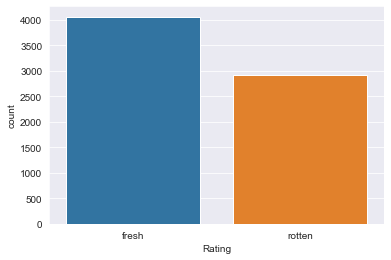

In [14]:
# map rating to binary
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.countplot("Rating", data=df)

In [15]:
# undersample the review data, makes data balanced
dfok=df[df['Rating']=='fresh']
dfbad=df[df['Rating']=='rotten']

ddf=pd.concat([dfok.sample(len(dfbad)),dfbad])
Xdata=ddf['Comment']
Ydata=ddf['Rating']

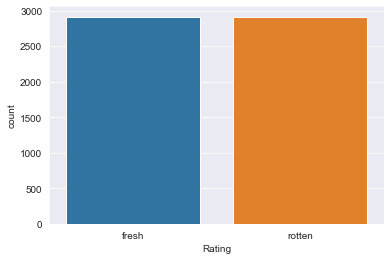

In [16]:
sns.countplot("Rating", data=ddf)

In [41]:
#nltk.download('stopwords')
sw=stopwords.words('english')


In [49]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')

#Reduce words to their root form
lemmed_sent = []
for w in sw:
    lemmed=[]
    for word in w:
        lemmed.append(WordNetLemmatizer().lemmatize(word))
    lemmed=(' ').join(lemmed)
    lemmed_sent.append(lemmed)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachelchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=0.01, max_df=0.8)#, stop_words=stopwords.words('english'))

In [51]:
X_processed = vectorizer.fit_transform(Xdata).toarray() #Convert text to tf-idf matrix
Y_processed=Ydata.replace('rotten',0.0).replace('fresh',1.0) #binarize

# Part 3: Baseline Classifier

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed,Y_processed, test_size=0.2)

In [60]:
text_classifier = RandomForestClassifier(n_estimators=500,max_leaf_nodes=10)
text_classifier.fit(X_train, Y_train)
predictions = text_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,predictions))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))
print(text_classifier.score(X_train,Y_train))
print(text_classifier.score(X_test,Y_test))

[[ 862 4095]
 [ 174 6060]]
              precision    recall  f1-score   support

       False       0.83      0.17      0.29      4957
        True       0.60      0.97      0.74      6234

    accuracy                           0.62     11191
   macro avg       0.71      0.57      0.51     11191
weighted avg       0.70      0.62      0.54     11191

0.618532749530873
0.6403789012756641
0.618532749530873


# Part 4: Improvement

In [63]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import *
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from subprocess import call

#import data
df=pd.read_csv("rrvv.txt",sep='{',header=None)

df=df.dropna()

#stopwords
sw=stopwords.words('english')
sw_movie=[
# 'movie',
# 'lewis',
# 'film',
# 'one',
# 'really',
# 'dicaprio',
# 'story',
# 'time',
# 'still',
# 'movies',
# 'though',
# 'made',
# 'get',
# 'way',
# 'films',
# 'thing',
# 'got',
]
sw=sw+sw_movie

Xdata=df[1]
Ydata=df[0]

vectorizer = TfidfVectorizer(max_features=2500, min_df=30, max_df=1.0, stop_words=sw)
X_processed = vectorizer.fit_transform(Xdata).toarray()
vectorizer.get_feature_names()

#convert to float because it's string originally due to some reasons
Y_processed=Ydata.astype('float64')
# define score>4 as good and score<=4 as bad
Y_processed=Y_processed.apply(lambda x: x>4)

X_train, X_test, Y_train, Y_test = train_test_split(X_processed,Y_processed, test_size=0.2)

RFclassifier = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=16) 
RFclassifier.fit(X_train, Y_train)
predictions = RFclassifier.predict(X_test)
print(RFclassifier.score(X_train,Y_train))
print(RFclassifier.score(X_test,Y_test))

LRclassifier = (solver='lbfgs') 
LRclassifier.fit(X_train, Y_train)
predictions = LRclassifier.predict(X_test)
print(LRclassifier.score(X_train,Y_train))
print(LRclassifier.score(X_test,Y_test))

#output importance feature and their names
fea=vectorizer.get_feature_names()
imp=RFclassifier.feature_importances_
impdf=pd.DataFrame(imp,fea)
#export to csv with (feature name, importance)
impdf.sort_values(by=0,ascending=False).to_csv("simp.csv")


0.682915931279462
0.6775980698775802
0.8014119434328991
0.7805379322670003


# Part 5: EDA

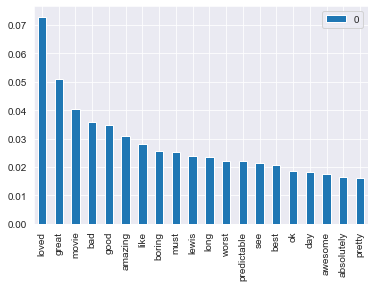

In [64]:
#output importance feature and their names
fea=vectorizer.get_feature_names()
imp=text_classifier.feature_importances_
impdf=pd.DataFrame(imp,fea)
#export to csv with (feature name, importance)
impdf.sort_values(by=0,ascending=False).to_csv("simp.csv")
#draw bar graph
impdf.sort_values(by=0,ascending=False)[:20].plot.bar()